In [1]:
import numpy as np

In [23]:
import matplotlib.pylab as lab

In [71]:
def split_area(point1 = 0, point2 = 9, N = 10):
    delta = (point2 - point1) / (N - 1)
    points = [(point1 + (delta*i)) for i in range(N)]
    return points

In [72]:
def f(x):
    return (x+1) * np.cos(1/x)

## 1 Разбиение отрезка на N частей

In [80]:
N = 10
points = split_area(1, (2*np.pi) + 1, N)
print(points)

[1.0, 1.698131700797732, 2.396263401595464, 3.0943951023931953, 3.792526803190927, 4.490658503988659, 5.1887902047863905, 5.886921905584122, 6.585053606381854, 7.283185307179586]


## 2 Значение f(x) в узлах интерполяции

In [75]:
values = [f(x) for x in points]
print(values)

[1.0806046117362795, 2.243663542665429, 3.104795804067537, 3.8824490759289367, 4.626888957132072, 5.355083704142243, 6.074212820282886, 6.787798991959548, 7.497761442923166, 8.205230611913178]


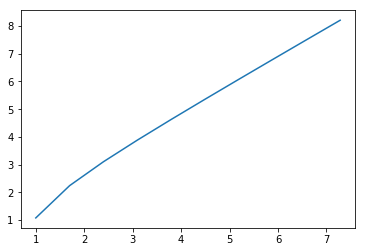

In [78]:
lab.figure()
lab.plot(points, values)

## 3 Построить интерполяционный полином Лагранжа

In [50]:
def Lagrangian(x, points, values):
    accum = 0
    for i, (x_i, f_x_i) in enumerate(zip(points, values)):
        poli = 1
        
        for j, x_j in enumerate(points):
            if j == i:
                continue
            else:
                poli *= (x - x_j) / (x_i - x_j)
                
        accum += f_x_i * poli
        
    return accum

## 4 Разбиение отрезка на M частей

In [82]:
M = 50

In [84]:
_points = split_area(1, (2*np.pi) + 1, M)
print(_points)

[1.0, 1.1282282715750935, 1.256456543150187, 1.3846848147252808, 1.5129130863003744, 1.6411413578754679, 1.7693696294505616, 1.8975979010256552, 2.0258261726007487, 2.1540544441758422, 2.2822827157509358, 2.4105109873260293, 2.5387392589011233, 2.6669675304762164, 2.7951958020513104, 2.923424073626404, 3.0516523452014974, 3.179880616776591, 3.3081088883516845, 3.436337159926778, 3.5645654315018716, 3.6927937030769655, 3.821021974652059, 3.9492502462271526, 4.077478517802247, 4.20570678937734, 4.333935060952433, 4.462163332527527, 4.590391604102621, 4.718619875677714, 4.846848147252808, 4.975076418827902, 5.103304690402995, 5.231532961978089, 5.359761233553182, 5.487989505128276, 5.616217776703369, 5.744446048278463, 5.872674319853556, 6.00090259142865, 6.129130863003743, 6.257359134578837, 6.385587406153931, 6.513815677729024, 6.642043949304118, 6.770272220879211, 6.898500492454305, 7.026728764029398, 7.154957035604492, 7.283185307179586]


## 5 Выведение таблицы

In [91]:
df = pd.DataFrame({
    "L(x_i)": [Lagrangian(x, points, values) for x in _points],
    "f(x_i)": [f(x) for x in _points],
    "x_i": _points
})

In [100]:
print("|x_i       |f(x_i)    |L(x_i)    |")
print("|----------|----------|----------|")
for x_i, f_x_i, L_x_i in zip(_points, [f(x) for x in _points], [Lagrangian(x, points, values) for x in _points]):
    print(f'|{x_i:.6f}  |{f_x_i:.6f}  |{L_x_i:.6f}  |')
    print("|----------|----------|----------|")

|x_i       |f(x_i)    |L(x_i)    |
|----------|----------|----------|
|1.000000  |1.080605  |1.080605  |
|----------|----------|----------|
|1.128228  |1.345567  |1.341117  |
|----------|----------|----------|
|1.256457  |1.578729  |1.574380  |
|----------|----------|----------|
|1.384685  |1.789378  |1.786511  |
|----------|----------|----------|
|1.512913  |1.983676  |1.982310  |
|----------|----------|----------|
|1.641141  |2.165816  |2.165508  |
|----------|----------|----------|
|1.769370  |2.338721  |2.338982  |
|----------|----------|----------|
|1.897598  |2.504477  |2.504929  |
|----------|----------|----------|
|2.025826  |2.664605  |2.665018  |
|----------|----------|----------|
|2.154054  |2.820235  |2.820506  |
|----------|----------|----------|
|2.282283  |2.972221  |2.972334  |
|----------|----------|----------|
|2.410511  |3.121221  |3.121209  |
|----------|----------|----------|
|2.538739  |3.267745  |3.267662  |
|----------|----------|----------|
|2.666968  |3.412198